# HSE 2022: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task. 
Loops are only allowed in part 1 (Tasks 1 - 4). 
* Some tasks contain tests. They only test you solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task. 

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points) 

**Task 1** (0.5 points)<br/> 
Enter nonzero numbers `a`,  `r` and `N`. Find the first `N` members of geometric progression with the first member `a` and factor `r`, without using formula for the product.

In [ ]:
def find_product(a,r,N):
    arr_product = []
    while N > 0:
        arr_product.append(a)
        a *= r
        N -= 1
    return arr_product

a = 2
r = 3
N = 3
print(find_product(a,r,N))

[2, 6, 18]


**Task 2** (0.5 points) <br/> 
Enter an integer number `N`. Check if it is a palindrome number. It means that it can be read equally from left to right and from right to back. 

In [ ]:
def check_palindrome(N):
    сheck = False
    string_N = str(N)
    if(string_N == string_N[::-1]):
        сheck = True
    return сheck

for N in [3, 81, 111, 113, 810, 2022, 4774, 51315, 611816]:
    print(N, check_palindrome(N))

3 True
81 False
111 True
113 False
810 False
2022 False
4774 True
51315 True
611816 False


**Task 3** (0.5 points) <br/> 
Find the first `N` palindrome numbers starting from 1000 (you may use the function from the precious task).

In [ ]:
def find_palindromes(N):
    palindromes = []
    current = 1000
    while N > 0:
        if(check_palindrome(current)):
            palindromes.append(current)
            N -= 1
        current += 1

    return palindromes

print(find_palindromes(5))
print(find_palindromes(10))
print(find_palindromes(20))

[1001, 1111, 1221, 1331, 1441]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991, 2002, 2112, 2222, 2332, 2442, 2552, 2662, 2772, 2882, 2992]


**Task 4** (0.5 points) <br/> 
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the minimum number.

In [ ]:
from random import randint
def find_min(a, b, c):
    min_ = a
    if b < min_:
        min_ = b
    if c < min_:
        min_ = c
    return min_

for i in range(10):
    
    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)
    
    print(a, b, c, '\tMinimum:', find_min(a, b, c))

80 2 1 	Minimum: 1
12 89 24 	Minimum: 12
92 29 -59 	Minimum: -59
71 92 -53 	Minimum: -53
-8 13 -63 	Minimum: -63
-51 -90 82 	Minimum: -90
-17 -3 -87 	Minimum: -87
-7 95 -28 	Minimum: -28
-48 86 -71 	Minimum: -71
30 -63 1 	Minimum: -63


# 2. Numpy (4 points)

**Task 1** (0.5 points) <br/>
Create a random array (`np.random.rand()`) with length of 17 and with sum of its elements equals to 6.

In [ ]:
my_array = np.random.rand(17)
my_array *= 6 / np.sum(my_array)
print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')
assert len(my_array) == 17
assert np.allclose(np.sum(my_array), 6)

Length: 17
Sum of elements: 6.0


**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length. 

Calculate the following distances between the arrays **without using special function. You may only use basic numpy operations (`np.linalg.*` and other high-level ones are prohibited).**:

* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev Distance
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$


In [ ]:
def calculate_manhattan(a, b):    
    distance = np.sum(np.abs(a - b))
    return distance

def calculate_euclidean(a, b):    
    distance = np.sqrt(np.sum((a - b) ** 2))
    return distance

def calculate_chebyshev(a, b):    
    distance = np.max(np.abs(a - b))
    return distance

def calculate_cosine(a, b):    
    distance = 1 - np.dot(a, b) / (np.sqrt(np.sum(a ** 2)) * np.sqrt(np.sum(b ** 2)))
    return distance

In [ ]:
length = 20
a = np.random.rand(length)
b = np.random.rand(length)
print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')

assert np.allclose(np.linalg.norm(a - b, ord = 1), calculate_manhattan(a, b))
assert np.allclose(np.linalg.norm(a - b), calculate_euclidean(a, b))
assert np.allclose(np.linalg.norm(a - b, ord = np.inf), calculate_chebyshev(a, b))
assert np.allclose(1 - np.dot(a, b)/(np.linalg.norm(a)*(np.linalg.norm(b))), calculate_cosine(a, b))

Manhattan distance: 5.151993571002997
Euclidean distance: 1.4621141479037871
Chebyshev distance: 0.5838245915522428
Cosine distance: 0.16570784533364902


**Task 3** (0.5 points) <br/>
Create a random array (`np.random.randint()`) with length of 76. Transform the array so that 
* Maximum element(s) value is -1
* Minimum element(s) value is -4
* Other values are in interval (-4; -1) with keeping the order

In [ ]:
def transform(array):
    transformed_array = (3 * (array - np.min(array)) / (np.max(array) - np.min(array))) - 4
    return transformed_array

In [ ]:
my_array = np.random.randint(-100, 101, size = 76)
my_array = transform(my_array)
print(f'Min: {np.min(my_array)}')
print(f'Max: {np.max(my_array)}')
print('Array:')
print(my_array)

assert np.allclose(np.max(my_array), -1)
assert np.allclose(np.min(my_array), -4)

Min: -4.0
Max: -1.0
Array:
[-3.15384615 -2.93846154 -2.64615385 -3.33846154 -1.4        -3.44615385
 -3.81538462 -1.84615385 -3.76923077 -1.92307692 -2.29230769 -1.72307692
 -3.90769231 -3.58461538 -2.30769231 -3.69230769 -2.12307692 -1.23076923
 -3.86153846 -2.56923077 -3.43076923 -1.53846154 -2.83076923 -3.13846154
 -3.72307692 -2.06153846 -2.86153846 -2.47692308 -2.36923077 -2.78461538
 -2.83076923 -1.41538462 -1.84615385 -1.         -3.21538462 -1.55384615
 -2.61538462 -1.29230769 -4.         -3.73846154 -3.72307692 -2.93846154
 -2.09230769 -1.32307692 -3.35384615 -1.10769231 -2.18461538 -2.03076923
 -2.61538462 -1.53846154 -2.93846154 -1.43076923 -3.23076923 -2.96923077
 -1.78461538 -2.53846154 -3.61538462 -2.23076923 -2.52307692 -1.07692308
 -3.98461538 -1.43076923 -3.84615385 -2.21538462 -1.55384615 -2.69230769
 -1.36923077 -3.35384615 -1.53846154 -2.4        -1.44615385 -1.50769231
 -2.         -2.58461538 -3.66153846 -1.63076923]


**Task 4** (0.5 points) <br/>
Create an array with shape of $8 \times 5$ with integers from [-7, 43]. Print a column that contains the maximum element of the array.

In [ ]:
my_array = np.random.randint(-7, 44, size = (8, 5))
selected_column = my_array[:, np.argmax(my_array) % 5]
print('Shape: ', my_array.shape)
print('Array:')
print(my_array)
print(f'Selected column: {selected_column}')

Shape:  (8, 5)
Array:
[[ 1 42  2 39 -3]
 [33 26 29 28 37]
 [26 24 43 11 33]
 [19  2 19 23 35]
 [ 5 17 41 36 16]
 [ 1 28 -2 34 39]
 [36 15 -4  6 11]
 [ 9 26 17 34 -3]]
Selected column: [ 2 29 43 19 41 -2 -4 17]


**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with median.

In [ ]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print('Array:')
print(arr)

Array:
[0.70816962        nan        nan 0.47386402        nan 0.85008334
 0.53301439 0.56120792 0.91178476        nan]


In [ ]:
def replace_missing(arr):
    array_without_missing = arr
    array_without_missing[np.isnan(arr)] = np.median(arr[~np.isnan(arr)])
    return array_without_missing

In [ ]:
arr = replace_missing(arr)
print('Array with no missing values:')
print(arr)

Array with no missing values:
[0.70816962 0.63468877 0.63468877 0.47386402 0.63468877 0.85008334
 0.53301439 0.56120792 0.91178476 0.63468877]


**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the mean for all 3 channels (a vector of shape 3).

In [ ]:
def mean_channel(X):
    red = np.mean(X[:,:,0])
    green = np.mean(X[:,:,1])
    blue = np.mean(X[:,:,2])
    mean_vector = [red, green, blue]
    return mean_vector

In [ ]:
n = 19
m = 23
# Кажется, что изображение имеет размеры 3,n,m - 3 матрицы (каждая 19х23), RGB
# X =  np.random.randint(-11, 8, size=(3,n, m)) - было бы проще
# Видимо, это специальное усложнение
X =  np.random.randint(-11, 8, size=(n, m, 3))
print(f'Vector of means: {mean_channel(X)}')

Vector of means: [-1.9176201372997712, -1.8352402745995424, -1.8123569794050343]


### **Task 7** (1 points) <br/>
Create a function which takes a 3D matrix ```X``` as an input and returns all its unique vertical (first axis) layers.

Sample input:

     ([[[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]
        [4, 5, 6]],

       [[7, 8, 9],
        [7, 8, 9]
        [7, 8, 9]]])
        
Sample output:

     ([[[1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]],

       [[7, 8, 9],
        [7, 8, 9]]])

In [ ]:
def get_unique_columns(X):
    X_unique = np.unique(X, axis=1)
    return X_unique

In [ ]:
X =  np.random.randint(4, 6, size=(n, 3, 3))
print('Matrix:')
print(X)
print('Unique columns:')
get_unique_columns(X)

Matrix:
[[[4 5 5]
  [4 4 5]
  [4 5 4]]

 [[4 4 5]
  [4 5 5]
  [5 5 4]]

 [[4 5 5]
  [4 4 5]
  [4 4 4]]

 [[5 5 4]
  [4 5 4]
  [5 4 5]]

 [[4 4 4]
  [5 5 4]
  [5 5 5]]

 [[5 5 5]
  [4 5 4]
  [4 5 5]]

 [[4 4 4]
  [5 5 5]
  [5 5 4]]

 [[4 4 5]
  [4 5 4]
  [4 5 5]]

 [[5 4 5]
  [4 4 5]
  [4 5 5]]

 [[5 4 4]
  [5 5 4]
  [4 5 4]]

 [[4 5 4]
  [4 4 5]
  [4 5 4]]

 [[4 5 5]
  [5 4 5]
  [5 4 5]]

 [[4 5 5]
  [4 4 5]
  [5 5 5]]

 [[4 4 4]
  [5 4 5]
  [5 4 5]]

 [[4 5 5]
  [5 4 4]
  [5 4 4]]

 [[5 5 5]
  [5 4 4]
  [5 5 4]]

 [[5 4 4]
  [4 4 5]
  [5 5 4]]

 [[5 5 4]
  [4 4 4]
  [4 5 5]]

 [[4 5 5]
  [5 4 5]
  [4 4 4]]]
Unique columns:


array([[[4, 4, 5],
        [4, 5, 4],
        [4, 5, 5]],

       [[4, 5, 5],
        [5, 5, 4],
        [4, 4, 5]],

       [[4, 4, 5],
        [4, 4, 4],
        [4, 5, 5]],

       [[4, 5, 4],
        [5, 4, 5],
        [5, 5, 4]],

       [[5, 5, 4],
        [5, 5, 5],
        [4, 4, 4]],

       [[4, 5, 4],
        [4, 5, 5],
        [5, 5, 5]],

       [[5, 5, 5],
        [5, 5, 4],
        [4, 4, 4]],

       [[4, 5, 4],
        [4, 5, 5],
        [4, 4, 5]],

       [[4, 4, 5],
        [4, 5, 5],
        [5, 4, 5]],

       [[5, 5, 4],
        [4, 5, 4],
        [5, 4, 4]],

       [[4, 4, 5],
        [4, 5, 4],
        [4, 5, 4]],

       [[5, 4, 5],
        [5, 4, 5],
        [4, 5, 5]],

       [[4, 4, 5],
        [5, 5, 5],
        [4, 5, 5]],

       [[5, 4, 5],
        [5, 4, 5],
        [4, 4, 4]],

       [[5, 4, 4],
        [5, 4, 4],
        [4, 5, 5]],

       [[5, 4, 4],
        [5, 5, 4],
        [5, 5, 5]],

       [[4, 4, 5],
        [5, 5, 4],
        [5, 4, 4]]

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task wont't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset and print first 5 rows

In [ ]:
dataset = pd.read_csv("titanic.csv", index_col=0)
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * What is the percentage of survived passengers? Are the classes balanced?
    * Were there more males or females?
    * What what the least popular port of embarkation?
    * How many classes (pclass) were there on Tinanic?
    * What is the overall average ticket fare? And for every class?
Please, write not only the answers but the code, proving it.

In [ ]:
# Are there any missing values? In what columns?

dataset.isna().sum()

# Total: 891
# Yes, there are missimg values in Age, Cabin (many!), Embarked

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
# What is the percentage of survived passengers? Are the classes balanced?

percentage = dataset.Survived.sum() * 100 / len(dataset)
print(f'Percentage of survived passengers: {percentage}')

# 38.38
# Inbalanced, because we have a big difference between the number of survivors 
# and non-survivors 
# (there are a lot of people who didn't survive, but few of those who survived)

Percentage of survived passengers: 38.38383838383838


In [ ]:
# Were there more males or females?

vc = dataset['Sex'].value_counts()
id = vc.idxmax()
count = vc.max()
print(f'More {id} ({count})')

# Male

More male (577)


In [ ]:
# What what the least popular port of embarkation?

least_popular = dataset['Embarked'].value_counts().idxmin()
print(f'The least popular port of embarkation: {least_popular}')

# Q

The least popular port of embarkation: Q


In [ ]:
# How many classes (pclass) were there on Tinanic?

count_of_classes = len(dataset['Pclass'].value_counts())
print(f'Count of classes: {count_of_classes}')

# 3

Count of classes: 3


In [ ]:
# What is the overall average ticket fare? And for every class?

overall = dataset['Fare'].mean()

# 32.2

print(f'Overall percentage of survived: {overall}')
print('For classes')
print(dataset.groupby('Pclass')['Fare'].mean())

# 1: 84.15; 2: 20.66; 3: 13.68

Overall percentage of survived: 32.204207968574636
For classes
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


**Task 2** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example). 

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the mean age? And among males and females sepatately? Visualize it on the plot
    * Make conclusions about what you see on the plot

In [ ]:
# What is the minimal and maximum ages of the passengers?

min = dataset['Age'].min()
print(f'Minimal age of the passengers: {min}')

# 0.42

max = dataset['Age'].max()
print(f'Maximum age of the passengers: {max}')

# 80.0

Minimal age of the passengers: 0.42
Maximum age of the passengers: 80.0


In [ ]:
# What is the mean age? And among males and females sepatately?

mean = dataset['Age'].mean()
print(f'Mean age of the passengers: {mean}')

# 29.7

print(f'Mean age for each')
dataset.groupby('Sex')['Age'].mean()

# Female: 27.92; Male: 30.73

Mean age of the passengers: 29.69911764705882
Mean age for each


Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

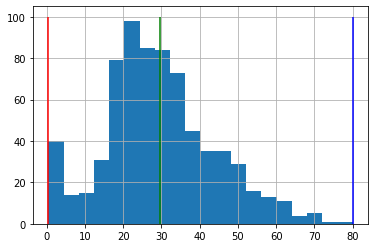

In [ ]:
# Visualization

dataset["Age"].hist(bins=20)
plt.vlines(min, 0, 100, color='r')
plt.vlines(mean, 0, 100, color='g')
plt.vlines(max, 0, 100, color='b')
plt.show()

Make conclusions about what you see on the plot

It is inbalanced to the right

The histogram shows that most of the young people on board were between the ages of 20 and 40


**Task 3** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot.

In [ ]:
# How many are there unique titles?

titles = dataset["Name"].apply(lambda s: (s.split(",")[1]).split('.')[0])
print(f'Count of unique titles: {len(titles.unique())}')

# 17

Count of unique titles: 17


In [ ]:
# How many are there passengers with every title?

print('Passengers with every title')
print(titles.value_counts())

Passengers with every title
 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Capt              1
 Ms                1
 Sir               1
 Lady              1
 Mme               1
 Don               1
 Jonkheer          1
Name: Name, dtype: int64


In [ ]:
# What is the most popular man's title? And woman's title?

most_for_male = dataset[dataset.Sex == 'male']["Name"].apply(lambda s: (s.split(",")[1]).split('.')[0]).value_counts()
print(f'Most popular for man is{most_for_male.idxmax()} with {most_for_male.max()} titles')

# Mr (517)

most_for_female = dataset[dataset.Sex == 'female']["Name"].apply(lambda s: (s.split(",")[1]).split('.')[0]).value_counts()
print(f'Most popular for woman is{most_for_female.idxmax()} with {most_for_female.max()} titles')

# Miss (182)

Most popular for man is Mr with 517 titles
Most popular for woman is Miss with 182 titles


**Task 4** (0.5 points) <br/>
Is there correlation between *pclass* and *ticket price*? Calculate mean price for each port and visualize prize distribution for each port. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). main point here is to **choose** plots wisely and **make meaningful conclusions**



In [ ]:
corr_class_fare = dataset.Pclass.corr(dataset.Fare)
print(f'Correlation between Pclass and Ticket price: {corr_class_fare}')

# -0.55

# There is a correlation between these features
# It is negative, so the dependence is reversed
# A ticket to a bigger class is cheaper (1 - the most expensive)

Correlation between Pclass and Ticket price: -0.5494996199439074


In [ ]:
mean_price_for_port = dataset.groupby('Pclass')['Fare'].mean()
print('Mean prices for each Class')
print(mean_price_for_port)

# 1: 84.15; 2: 20.66; 3: 13.68

Mean prices for each Class
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


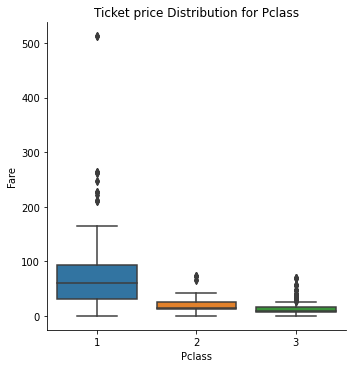

In [ ]:
# Visualization
plot = sns.catplot(x = 'Pclass', y = 'Fare', data = dataset, kind = "box")
plot.set(title = 'Ticket price Distribution for Pclass', xlabel = 'Pclass', ylabel = 'Fare');
plt.show()

Make conclusions about what you see on the plot

First class tickets are the most expensive

The graph confirms the conclusions about the correlation

**Task 5** (0.5 points) <br/>
The same question as in task 4 about correlation between *embarked* and *ticket priсe*.

In [ ]:
mean_price_for_port = dataset.groupby('Embarked')['Fare'].mean()
print('Mean prices for each Port')
print(mean_price_for_port)

# C: 59.95; Q: 13.28; S: 27.08

Mean prices for each Port
Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64


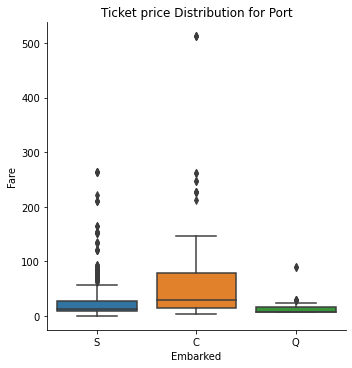

In [ ]:
# Visualization
plot = sns.catplot(x = 'Embarked', y = 'Fare', data = dataset, kind = 'box')
plot.set(title = 'Ticket price Distribution for Port', xlabel = 'Embarked', ylabel = 'Fare');
plt.show()

Make conclusions about what you see on the plot

There are correlation between pory of embarkation and ticket price

Tickets in Cherbourg are the most expensive, in Queenstown - the cheapest

**Task 6** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Provide the same visualization for males and females separately. Make conclusions about what you see on the plots

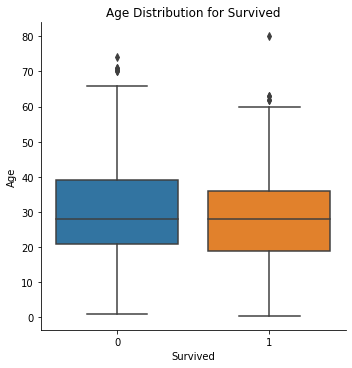

In [ ]:
plot = sns.catplot(x = "Survived", y = "Age", data = dataset, kind = "box")
plot.set(title = 'Age Distribution for Survived', xlabel = 'Survived', ylabel = 'Age');
plt.show()

In [ ]:
print('Mean age for each class')
print(dataset.groupby('Pclass')['Age'].mean())
# 1: 38.23; 2: 29.88; 3: 25.14

Mean age for each class
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


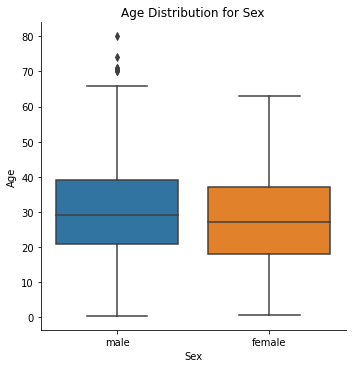

In [ ]:
plot = sns.catplot(x = "Sex", y = "Age", data = dataset, kind = "box")
plot.set(title = 'Age Distribution for Sex', xlabel = 'Sex', ylabel = 'Age');
plt.show()

In [ ]:
print('Mean age')
print(dataset.groupby('Sex')['Age'].mean())
# Female: 27.92; Male: 30.73

Mean age
Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64


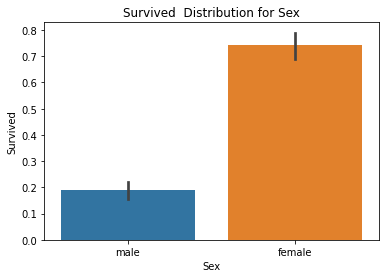

In [ ]:
plot = sns.barplot(x = "Sex", y = "Survived", data = dataset)
plot.set(title = 'Survived  Distribution for Sex', xlabel = 'Sex', ylabel = 'Survived');
plt.show()

In [ ]:
dataset.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

Make conclusions about what you see on the plots

Most of the women on board survived

The age of most survivors is in the range of 20 - 40

On average, men are older than women on board

# Brief conclusion

Very interesting homework

As a person who is now actively studying this field, I liked the fact that all the material needed to complete these tasks was sorted out at lectures and seminars. It was moderately easy and difficult.

Thanks)